### Uploading the required libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## Table of Contents

1	Introduction	
    1.1	Scenario and Introduction:	
    1.2	Problem Definition:	
2	Data	
    2.1 Data Requirements and Sources:	
    2.2 Data Pre-Processing:	
3 Methodology	
    3.1 Hotels Data Analysis	
    3.2 Subway Data Analysis	
    3.3 Manhattan Neighborhood Cluster Analysis	
4 Results
    4.1 The requisite plots and data segments obtained
5 Discussion
    5.1 Discussion of the results and implications for the problem statement
6 Problem Resolution	
    6.1 Making the final Decision


## Introduction

### 1.1	 Scenario and Introduction:
I will be graduating during the week of May 21 from New York University. I am inviting my family to spend a week in New York City to attend the graduation ceremony and spend some time travelling and exploring the city. My family likes to explore cultural sites within the city. I intend to use location-based data and data science techniques to select the best possible hotel for my duration that addresses their travelling and comfort needs. 

### 1.2	 **Problem Definition:**
The hotel selected should have the following characteristics
•	The total cost of stay for a week should be less than the budget of USD 1000
•	The hotel should at least have a rating of 3 stars
•	The hotel should be in a neighborhood located close to a cluster of culturally significant tourist attractions like museums, art galleries, auditoriums etc.
•	The hotel should be located within walking distance to a subway station
•	The hotel should not be more than 1 hour away from the closest airport
•	The hotel should be in a neighborhood with a high proportion of Indian restaurants and halal food options


## 2	Data 

### 2.1 Data Requirements and Sources:
There are numerous types of data that would be required for this project:
•	List of neighborhoods and their geographical coordinates
    o	Potential Sources: New York University (Catalog of NYC Neighborhoods)
•	Location data of Subway stations in New York City
    o	Potential Sources: MTA, Wikipedia etc.
•	Information on venues in Neighborhoods and category information
    o	Potential Sources: Foursquare API
•	Hotel information including price, amenities, and location information
    o	Potential Source: Hotel Aggregating sites like Trivago, Google etc.

### 2.2 Data Pre-Processing:

•	List of neighborhoods was obtained from the NYU catalog and the same file used in the course lab with the requisite latitude and longitude information was used


In [2]:
#Getting data from file on the server
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset 
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
#Converting the dataset into a pandas dataframe
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# Looping through the dataset and adding rows to the created dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [4]:
#Examine Dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
#Examine Dataframe for Manhattan
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Hotels Pre-Processing

The hotels data was generated by going to Hotels.com, entering the criteria for the dates, the amenities, and the start-rating of hotels under consideration. The BeautifulSoup package was then used in conjunction with the selenium and chromedriver packages to scrape the data as the page was had an infinite scrolling layout which was difficult to scrape from the IBM Watson studio environment due to difficulty installing the local packages. The code was then run on my local machine and the output csv file is used as the starting point in this code base.

I had scraped hotels.com for the relevant dates and amenity criteria and obtained a number of fields including the address. In this section we will also get the geo co-ordinates using nominatim


In [6]:
#hotel_data=pd.read_csv("Hotels.csv")

In [7]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3f06e28da3b64e3281eaef370c6567a5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kWdfDqf7KX3-SBF14OOl39KIaqQJA4iv3EDxs41R_sh9',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3f06e28da3b64e3281eaef370c6567a5.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-idgbim5r4qdk9n',Key='Hotels.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

hotel_data = pd.read_csv(body)
hotel_data.head()


,Hotel Name,Address,Rating,Price
0,Hotel Henri,"37 W 24th Street, New York, NY, 10010, United ...",3.5-star,$483
1,"Staypineapple, An Artful Hotel, Midtown","337 W 36th Street, New York, NY, 10018, United...",3-star,"$1,035"
2,Embassy Suites by Hilton New York Manhattan Ti...,"60 West 37th Street, New York, NY, 10018, Unit...",3.5-star,$946
3,Washington Square Hotel,"103 Waverly Pl, New York, NY, 10011, United St...",3.5-star,$918
4,Concorde Hotel New York,"127 East 55th Street, New York, NY, 10022, Uni...",3.5-star,$881


In [8]:
#hotel_data.head()

In [9]:
import csv
column_names = ['Hotel Name', 'Address', 'Latitude', 'Longitude','Rating','Price'] 
csv_file = open('hotels_locations.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(column_names)

for n in range(len(hotel_data)):

    try:
        name = str(hotel_data['Hotel Name'][n])
        rating = str(hotel_data['Rating'][n])
        price = str(hotel_data['Price'][n])
        geolocator = Nominatim(user_agent="ny_explorer")
        address = str(hotel_data['Address'][n])
        location = geolocator.geocode(address)
        latitude = str(location.latitude)
        longitude = str(location.longitude)
        #hotel_location_data.append({'Hotel Name':name,'Address':address,'Latitude':latitude,'Longitude':longitude,'Rating':rating,'Price':price},ignore_index=True)
    
    except AttributeError:
        latitude = 'NA'
        longitude = 'NA'
        continue
        
    csv_writer.writerow([name, address, latitude, longitude, rating, price])
    
    #print(name,address,latitude,longitude,rating,price)

csv_file.close()

In [10]:
hotels_location_data = pd.read_csv('hotels_locations.csv')
hotels_location_data.head()


,Hotel Name,Address,Latitude,Longitude,Rating,Price
0,Hotel Henri,"37 W 24th Street, New York, NY, 10010, United ...",42.734027,-73.699268,3.5-star,$483
1,"Staypineapple, An Artful Hotel, Midtown","337 W 36th Street, New York, NY, 10018, United...",40.755211,-73.996661,3-star,"$1,035"
2,Embassy Suites by Hilton New York Manhattan Ti...,"60 West 37th Street, New York, NY, 10018, Unit...",40.751153,-73.985907,3.5-star,$946
3,Washington Square Hotel,"103 Waverly Pl, New York, NY, 10011, United St...",40.732497,-73.998736,3.5-star,$918
4,Concorde Hotel New York,"127 East 55th Street, New York, NY, 10022, Uni...",40.759981,-73.970425,3.5-star,$881


In [11]:
hotels_location_data.shape

(87, 6)

In [12]:
hotels_location_data

,Hotel Name,Address,Latitude,Longitude,Rating,Price
0,Hotel Henri,"37 W 24th Street, New York, NY, 10010, United ...",42.734027,-73.699268,3.5-star,$483
1,"Staypineapple, An Artful Hotel, Midtown","337 W 36th Street, New York, NY, 10018, United...",40.755211,-73.996661,3-star,"$1,035"
2,Embassy Suites by Hilton New York Manhattan Ti...,"60 West 37th Street, New York, NY, 10018, Unit...",40.751153,-73.985907,3.5-star,$946
3,Washington Square Hotel,"103 Waverly Pl, New York, NY, 10011, United St...",40.732497,-73.998736,3.5-star,$918
4,Concorde Hotel New York,"127 East 55th Street, New York, NY, 10022, Uni...",40.759981,-73.970425,3.5-star,$881
5,Orchard Street Hotel,"163 Orchard Street, New York, NY, 10002, Unite...",40.721182,-73.988947,3-star,$395
6,The Mansfield Hotel,"12 W 44th St, New York, NY, 10036, United States",40.755040,-73.981094,3.5-star,$547
7,Redford Hotel,"136 Ludlow Street, New York, NY, 10002, United...",40.720321,-73.988024,3.5-star,$395
8,Fairfield Inn by Marriott New York Manhattan/T...,"330 West 40th Street, New York, NY, 10018, Uni...",40.756552,-73.992474,3-star,$450
9,Holiday Inn Express New York City Times Square,"343 W 39th Street, New York, NY, 10018, United...",40.756354,-73.993089,3-star,$764


## Subway Data-PreProcessing

•	The list of subway stations was obtained from developer data from MTA and loaded in via the pandas read_csv method. The list already includes latitude and longitude information so we don't have to pull this from nominatim
ta and plotting it

In [13]:
subway_data=pd.read_csv("http://web.mta.info/developers/data/nyct/subway/Stations.csv")
subway_data.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


## Methodology

### 3.1 Data Visualization



#### Plot of Manhattan Neighborhoods

In [19]:
# create map of New York using latitude and longitude values
latitude = 40.7127281
longitude = -74.0060152
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=13.5)

for lat, lng, borough, neighborhood in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_newyork) 

map_newyork

#### Hotels Data Analysis
The hotels data will be analyzed to visualize the geographical spread of the hotels and quickly view characteristics such as price and star rating on the pop-ups on the folium map


In [20]:
# plotting the hotels on a folium map
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, price, name, rating in zip(hotels_location_data['Latitude'], hotels_location_data['Longitude'],hotels_location_data['Price'].astype(str), hotels_location_data['Hotel Name'],hotels_location_data['Rating']):      
    popup_text = 'Name: {}, Price: {}, Rating{}'.format(name,price,rating)
    label = folium.Popup(popup_text, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

#### Subway Data Analysis
The subway data will be plotted on the map concurrently with hotels and neighborhood information to aid in the final process of selecting the right hotel. The hotel must be close to subways and different lines



In [21]:
subway_map = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(subway_data['GTFS Latitude'], subway_data['GTFS Longitude'],subway_data['Stop Name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(subway_map) 
    

subway_map

## Consolidated Map
Red - Neighborhoods 
Blue - Hotels 
Green - Subway Stations

In [22]:
latitude= 40.7308619
longitude= -73.9871558

map_mh_consolidated = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add neighborhood markers to map
for lat, lng, borough, neighborhood in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_mh_consolidated) 
    
# add hotel markers to map
for lat, lng, label in zip(hotels_location_data['Latitude'], hotels_location_data['Longitude'],hotels_location_data['Price'].astype(str)+ ',  '+ hotels_location_data['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_consolidated)
    
# add markers to map
for lat, lng, label in zip(subway_data['GTFS Latitude'], subway_data['GTFS Longitude'],subway_data['Stop Name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_consolidated) 
    
map_mh_consolidated

### 3.2 Exploratory Data Analysis of Hotel Prices and Ratings 

In [36]:
# Converting Price data in hotels database to integer value from current string configuration

hotels_location_data['Price_int'] = hotels_location_data.Price.str[1:] #REmoving the dollar style at the start
hotels_location_data['Price_int'] = hotels_location_data['Price_int'].str.replace(',','') #Delete commas
hotels_location_data['Price_int'] = pd.to_numeric(hotels_location_data.Price_int)
hotels_location_data.dtypes

Hotel Name     object
Address        object
Latitude      float64
Longitude     float64
Rating         object
Price          object
Price_int       int64
dtype: object

In [33]:
hotels_location_data.head()

,Hotel Name,Address,Latitude,Longitude,Rating,Price,Price_int
0,Hotel Henri,"37 W 24th Street, New York, NY, 10010, United ...",42.734027,-73.699268,3.5-star,$483,483
1,"Staypineapple, An Artful Hotel, Midtown","337 W 36th Street, New York, NY, 10018, United...",40.755211,-73.996661,3-star,"$1,035",1035
2,Embassy Suites by Hilton New York Manhattan Ti...,"60 West 37th Street, New York, NY, 10018, Unit...",40.751153,-73.985907,3.5-star,$946,946
3,Washington Square Hotel,"103 Waverly Pl, New York, NY, 10011, United St...",40.732497,-73.998736,3.5-star,$918,918
4,Concorde Hotel New York,"127 East 55th Street, New York, NY, 10022, Uni...",40.759981,-73.970425,3.5-star,$881,881


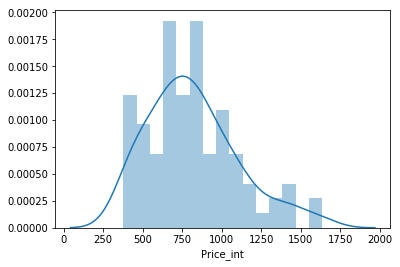

In [37]:
import seaborn as sns
sns.distplot(hotels_location_data['Price_int'].astype(int), bins = 15)

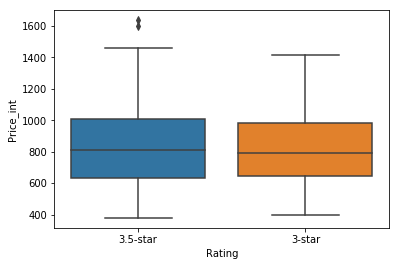

In [38]:
sns.boxplot(x='Rating', y= 'Price_int', data=hotels_location_data)

### Define foursquare credentials and version

In [39]:
CLIENT_ID = 'CDYEYZFDWHQRZP4R2PQE1VTVWF512VW4XVTIQCYICPOLBRNK' # your Foursquare ID
CLIENT_SECRET = 'IQV5PHHFTNCQ4CM4YTV0D15HVAQAR3TEUQ1GLQA0OM4HTOWV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


### Defining function to get nearby venues for each neighborhood from foursquare

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
   
    LIMIT = 100 
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
# Running code to get nearby venues for each neighborhood

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [42]:
# Check dataframe and shape
print(manhattan_venues.shape)
manhattan_venues.head()

(2997, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [43]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,59,59,59,59,59,59
Carnegie Hill,83,83,83,83,83,83
Central Harlem,45,45,45,45,45,45
Chelsea,98,98,98,98,98,98
Chinatown,100,100,100,100,100,100
Civic Center,86,86,86,86,86,86
Clinton,100,100,100,100,100,100
East Harlem,44,44,44,44,44,44
East Village,100,100,100,100,100,100


In [44]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 325 uniques categories.


### One hot Encoding for the venue categories for each neighborhood

In [45]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South American Restaurant,Souther

In [46]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South American Restaurant,Souther

In [47]:
manhattan_grouped.columns

Index(['Neighborhood', 'Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'American Restaurant',
       'Antique Shop', 'Arcade', 'Arepa Restaurant', 'Argentinian Restaurant',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Volleyball Court',
       'Waterfront', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint',
       'Women's Store', 'Yoga Studio'],
      dtype='object', length=326)

# Performing the Clustering Analysis

In [48]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South American Restaurant,Souther

In [49]:
#Defining categories from the analyses of unique value categories to determine the relevant fields to calculate culutural significance score and food preference score

cultural_categories = ['Art Gallery','Art Museum','Auditorium', 'Basketball Stadium', 'Concert Hall', 'Event Space', 'Exhibit', 'Historic Site', 'History Museum', ' Indie Movie Theater', 'Indie Theater', 'Jazz Club', 'Library', 'Memorial Site', 'Monument / Landmark', 'Museum', 'Opera House', 'Outdoor Sculpture', 'Park', 'Performing Arts Venue', 'Public Art', 'Plaza', 'Tennis Stadium', 'Theater', 'Tourist Information Center']

preferred_food_categories = ['Indian Restaurant', 'North Indian Restaurant', 'Middle Eastern Restaurant']

#Calculating the cultural significance score as the sum of means across culturally significant categories and Culinary Score in a similar fashion

manhattan_grouped['Score_Culture'] = manhattan_grouped.loc[:, cultural_categories].sum(axis = 1)
manhattan_grouped['Score_Food'] = manhattan_grouped.loc[:, preferred_food_categories].sum(axis = 1)

manhattan_grouped.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South American Restaurant,Souther

In [50]:
#Code to cluster the neighborhoods into 3 categories based on the scores assigned earlier

#Preparing Dataframe
manhattan_grouped_clustering = manhattan_grouped[['Score_Culture','Score_Food']]

#Set number of clusters
k_clusters = 3

kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 2, 1, 0, 0, 2, 0, 0, 2], dtype=int32)

### Let's explore the top 10 venue categories in each neighborhood

#### Defining Function to get  the top 10 venue categories

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Generating dataframe that holds the top 10 venue_categories for each neighborhood

In [52]:
import numpy as np

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted['Score_Culture'] = manhattan_grouped['Score_Culture']
neighborhoods_venues_sorted['Score_Food'] = manhattan_grouped['Score_Food']
    
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score_Culture,Score_Food
0,Battery Park City,Score_Culture,Park,Hotel,Gym,Memorial Site,Boat or Ferry,Playground,Plaza,Coffee Shop,Shopping Mall,0.237288,0.000000
1,Carnegie Hill,Coffee Shop,Yoga Studio,Wine Shop,Pizza Place,Japanese Restaurant,Gym / Fitness Center,Gym,Grocery Store,Bookstore,Café,0.024096,0.012048
2,Central Harlem,Score_Culture,African Restaurant,Seafood Restaurant,Cosmetics Shop,Chinese Restaurant,American Restaurant,Bar,French Restaurant,Boutique,Library,0.133333,0.000000
3,Chelsea,Score_Culture,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Park,Market,Juice Bar,Hotel,Theater,0.224490,0.010204
4,Chinatown,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Salon / Barbershop,Score_Culture,Optical Shop,Spa,Coffee Shop,Malay Restaurant,0.030000,0.000000


#### Creating new dataframe that contains cluster labels, neighborhood data and top 10 most common venue categories

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # We also have the scores at the end

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score_Culture,Score_Food
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Sandwich Place,Gym,American Restaurant,Coffee Shop,Ice Cream Shop,Tennis Stadium,Supplement Shop,Miscellaneous Shop,Shopping Mall,Seafood Restaurant,0.037037,0.000000
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Salon / Barbershop,Score_Culture,Optical Shop,Spa,Coffee Shop,Malay Restaurant,0.030000,0.000000
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,Score_Culture,Chinese Restaurant,Pizza Place,Gym,Mexican Restaurant,Latin American Restaurant,0.033708,0.011236
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Score_Culture,Pizza Place,Restaurant,Café,Lounge,Park,Chinese Restaurant,Spanish Restaurant,Frozen Yogurt Shop,0.054545,0.000000
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Cocktail Bar,Indian Restaurant,Liquor Store,Sushi Restaurant,Score_Food,0.033333,0.033333


#### Plotting the clusters 

Popups indicate cluster label, cultural score and food score

In [68]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=3
map_clusters_1= folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,culture_score,food_score in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels'], manhattan_merged['Score_Culture'],manhattan_merged['Score_Food']):
    popup_string = 'name: {}, cluster: {} Culture Score: {}, Food Score: {}'.format(poi, cluster, str(round(culture_score,2)), str(round(food_score,2)))
    label = folium.Popup(popup_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_1)
    
map_clusters_1
  

### Examining the 3 clusters

Cluster 1

In [69]:
cluster_summaries = pd.DataFrame(columns = ['Cluster No','Avg. Culture Score','Avg. Food Score'])
cluster_summaries

,Cluster No,Avg. Culture Score,Avg. Food Score


In [70]:
filt = manhattan_merged['Cluster Labels']==0
df = manhattan_merged.loc[filt]
print('Average Culture Score: {}, Average Food Score : {}'.format(df['Score_Culture'].mean(),df['Score_Food'].mean()))
cluster_summaries = cluster_summaries.append({'Cluster No':'1','Avg. Culture Score':str(round(df['Score_Culture'].mean(),2)),'Avg. Food Score':str(round(df['Score_Food'].mean(),2))}, ignore_index = True)


Average Culture Score: 0.03782788349270825, Average Food Score : 0.011162815476086088


In [71]:
df

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score_Culture,Score_Food
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Sandwich Place,Gym,American Restaurant,Coffee Shop,Ice Cream Shop,Tennis Stadium,Supplement Shop,Miscellaneous Shop,Shopping Mall,Seafood Restaurant,0.037037,0.000000
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Salon / Barbershop,Score_Culture,Optical Shop,Spa,Coffee Shop,Malay Restaurant,0.030000,0.000000
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,Score_Culture,Chinese Restaurant,Pizza Place,Gym,Mexican Restaurant,Latin American Restaurant,0.033708,0.011236
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Score_Culture,Pizza Place,Restaurant,Café,Lounge,Park,Chinese Restaurant,Spanish Restaurant,Frozen Yogurt Shop,0.054545,0.000000
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Deli / Bodega,Cocktail Bar,Indian Restaurant,Liquor Store,Sushi Restaurant,Score_Food,0.033333,0.033333
5,Manhattan,Manhattanville,40.816934,-73.957385,0,Seafood Restaurant,Coffee Shop,Italian Restaurant,Chinese Restaurant,Score_Culture,Park,Mexican Restaurant,Gastropub,Indian Restaurant,Japanese Curry Restaurant,0.045455,0.022727
7,Manhattan,East Harlem,40.792249,-73.944182,0,Mexican Restaurant,Bakery,Deli / Bodega,Score_Culture,Thai Restaurant,Latin American Restaurant,Steakhouse,Street Art,French Restaurant,Dance Studio,0.068182,0.000000
9,Manhattan,Yorkville,40.775930,-73.947118,0,Coffee Shop,Italian Restaurant,Gym,Bar,Sushi Restaurant,Deli / Bodega,Wine Shop,Diner,Score_Culture,Japanese Restaurant,0.030000,0.000000
10,Manhattan,Lenox Hill,40.768113,-73.958860,0,Italian Restaurant,Pizza Place,Coffee Shop,Cocktail Bar,Sushi Restaurant,Café,Gym / Fitness Center,Gym,Burger Joint,Salad Place,0.020000,0.010000
12,Manhattan,Upper West Side,40.787658,-73.977059,0,Italian Restaurant,Wine Bar,Bakery,Coffee Shop,Score_Food,Pizza Place,Mediterranean Restaurant,Ice Cream Shop,Bookstore,American Restaurant,0.000000,0.042857


Cluster 2

In [72]:
filt = manhattan_merged['Cluster Labels']==1
df = manhattan_merged.loc[filt]
print('Average Culture Score: {}, Average Food Score : {}'.format(df['Score_Culture'].mean(),df['Score_Food'].mean()))
cluster_summaries = cluster_summaries.append({'Cluster No':'2','Avg. Culture Score':str(round(df['Score_Culture'].mean(),2)),'Avg. Food Score':str(round(df['Score_Food'].mean(),2))}, ignore_index = True)

Average Culture Score: 0.2280000512446033, Average Food Score : 0.003401360544217687


In [73]:
df

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score_Culture,Score_Food
13,Manhattan,Lincoln Square,40.773529,-73.985338,1,Score_Culture,Italian Restaurant,Plaza,Café,Gym / Fitness Center,Concert Hall,Theater,Performing Arts Venue,Wine Shop,American Restaurant,0.222222,0.000000
17,Manhattan,Chelsea,40.744035,-74.003116,1,Score_Culture,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Park,Market,Juice Bar,Hotel,Theater,0.224490,0.010204
28,Manhattan,Battery Park City,40.711932,-74.016869,1,Score_Culture,Park,Hotel,Gym,Memorial Site,Boat or Ferry,Playground,Plaza,Coffee Shop,Shopping Mall,0.237288,0.000000


In [74]:
print(df[df.Score_Culture == df.Score_Culture.max()]) 

      Borough       Neighborhood   Latitude  Longitude  Cluster Labels  \
28  Manhattan  Battery Park City  40.711932 -74.016869               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
28         Score_Culture                  Park                 Hotel   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
28                   Gym         Memorial Site         Boat or Ferry   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
28            Playground                 Plaza           Coffee Shop   

   10th Most Common Venue  Score_Culture  Score_Food  
28          Shopping Mall       0.237288         0.0  


In [75]:
print(df[df.Score_Food == df.Score_Food.max()]) 

      Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
17  Manhattan      Chelsea  40.744035 -74.003116               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
17         Score_Culture           Art Gallery           Coffee Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
17    Italian Restaurant        Ice Cream Shop                  Park   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
17                Market             Juice Bar                 Hotel   

   10th Most Common Venue  Score_Culture  Score_Food  
17                Theater        0.22449    0.010204  


Cluster 3

In [76]:
filt = manhattan_merged['Cluster Labels']==2
df = manhattan_merged.loc[filt]
print('Average Culture Score: {}, Average Food Score : {}'.format(df['Score_Culture'].mean(),df['Score_Food'].mean()))
cluster_summaries = cluster_summaries.append({'Cluster No':'3','Avg. Culture Score':str(round(df['Score_Culture'].mean(),2)),'Avg. Food Score':str(round(df['Score_Food'].mean(),2))}, ignore_index = True)

Average Culture Score: 0.1171163591736596, Average Food Score : 0.006648209671465484


In [77]:
df

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score_Culture,Score_Food
6,Manhattan,Central Harlem,40.815976,-73.943211,2,Score_Culture,African Restaurant,Seafood Restaurant,Cosmetics Shop,Chinese Restaurant,American Restaurant,Bar,French Restaurant,Boutique,Library,0.133333,0.000000
8,Manhattan,Upper East Side,40.775639,-73.960508,2,Score_Culture,Italian Restaurant,Bakery,Juice Bar,Gym / Fitness Center,Wine Shop,Exhibit,Yoga Studio,Hotel,American Restaurant,0.116279,0.011628
11,Manhattan,Roosevelt Island,40.762160,-73.949168,2,Score_Culture,Park,Bubble Tea Shop,Scenic Lookout,Liquor Store,Metro Station,Supermarket,Bus Line,Farmers Market,Soccer Field,0.160000,0.000000
14,Manhattan,Clinton,40.759101,-73.996119,2,Score_Culture,Theater,Gym / Fitness Center,Coffee Shop,Gym,Hotel,Wine Shop,Italian Restaurant,Sandwich Place,Pizza Place,0.140000,0.000000
15,Manhattan,Midtown,40.754691,-73.981669,2,Score_Culture,Coffee Shop,Hotel,Clothing Store,Theater,Cuban Restaurant,Pizza Place,Spa,Tailor Shop,Steakhouse,0.090000,0.020000
20,Manhattan,Lower East Side,40.717807,-73.980890,2,Score_Culture,Chinese Restaurant,Cocktail Bar,Café,Theater,Art Gallery,Italian Restaurant,Flower Shop,Tennis Court,Gym,0.136364,0.000000
21,Manhattan,Tribeca,40.721522,-74.010683,2,Score_Culture,Park,Italian Restaurant,Wine Bar,Café,Spa,Bakery,Coffee Shop,Men's Store,Hotel,0.142857,0.014286
24,Manhattan,West Village,40.734434,-74.006180,2,Score_Culture,Italian Restaurant,Wine Bar,Coffee Shop,American Restaurant,Park,Jazz Club,New American Restaurant,Bakery,Seafood Restaurant,0.120000,0.020000
26,Manhattan,Morningside Heights,40.808000,-73.963896,2,Score_Culture,Park,Coffee Shop,American Restaurant,Bookstore,Pizza Place,Paper / Office Supplies Store,Deli / Bodega,Tennis Court,Burger Joint,0.119048,0.023810
29,Manhattan,Financial District,40.707107,-74.010665,2,Score_Culture,Coffee Shop,Hotel,American Restaurant,Pizza Place,Café,Park,Sandwich Place,Gym,Salad Place,0.120000,0.000000


In [78]:
cluster_summaries

,Cluster No,Avg. Culture Score,Avg. Food Score
0,1,0.04,0.01
1,2,0.23,0.0
2,3,0.12,0.01


## Making the Decision

Plotting a consolidated map to help make the decision of selecting the right hotel

In [79]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_decision_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# Plot hotels with prices and star rating

for lat, lng, price, name, rating in zip(hotels_location_data['Latitude'], hotels_location_data['Longitude'],hotels_location_data['Price'].astype(str), hotels_location_data['Hotel Name'],hotels_location_data['Rating']):      
    popup_text = 'Name: {}, Price: {}, Rating{}'.format(name,price,rating)
    label = folium.Popup(popup_text, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_decision_one) 
    
# Plot Subway stops 

for lat, lng, label in zip(subway_data['GTFS Latitude'], subway_data['GTFS Longitude'],subway_data['Stop Name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(map_decision_one) 
    
# plot neighborhood clusters as bubbles
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,culture_score,food_score in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels'], manhattan_merged['Score_Culture'],manhattan_merged['Score_Food']):
    popup_string = 'name: {}, cluster: {} Culture Score: {}, Food Score: {}'.format(poi, cluster+1, str(round(culture_score,2)), str(round(food_score,2)))
    label = folium.Popup(popup_string, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_decision_one)


# Adds tool to the top right
from folium.plugins import MeasureControl
map_decision_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_decision_one)

map_decision_one

    


